<a href="https://colab.research.google.com/github/bellatchen/Assignments/blob/main/Boston_Housing_Regression_Metrics_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bella Chen

Goal: Predict the PRICE based on the available features using a linear regression model.

All of the features and the target are continuous variables. 

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score




In [2]:
#mounting Data
boston_housing = "/content/drive/MyDrive/Coding Dojo/Data Sets/Boston_Housing_from_Sklearn.csv"
boston_housing_df = pd.read_csv(boston_housing)
boston_housing_df.head()


,CRIM,NOX,RM,AGE,PTRATIO,LSTAT,PRICE
0,0.00632,0.538,6.575,65.2,15.3,4.98,24.0
1,0.02731,0.469,6.421,78.9,17.8,9.14,21.6
2,0.02729,0.469,7.185,61.1,17.8,4.03,34.7
3,0.03237,0.458,6.998,45.8,18.7,2.94,33.4
4,0.06905,0.458,7.147,54.2,18.7,5.33,36.2


          CRIM     per capita crime rate by town

          NOX      nitric oxides concentration (parts per 10 million)

          RM       average number of rooms per dwelling

          AGE      proportion of owner-occupied units built prior to 1940

          PTRATIO  pupil-teacher ratio by town

          LSTAT    % lower economic status of the population

          PRICE   Median value of owner-occupied homes in $1000's

For now, you do not need to do any cleaning to this data set. You can use it "as is."

- determine if there are any moderate or strong correlations in your variables. 

,CRIM,NOX,RM,AGE,PTRATIO,LSTAT,PRICE
CRIM,1.00,0.42,-0.22,0.35,0.29,0.46,-0.39
NOX,0.42,1.00,-0.30,0.73,0.19,0.59,-0.43
RM,-0.22,-0.30,1.00,-0.24,-0.36,-0.61,0.70
AGE,0.35,0.73,-0.24,1.00,0.26,0.60,-0.38
PTRATIO,0.29,0.19,-0.36,0.26,1.00,0.37,-0.51
LSTAT,0.46,0.59,-0.61,0.60,0.37,1.00,-0.74
PRICE,-0.39,-0.43,0.70,-0.38,-0.51,-0.74,1.00


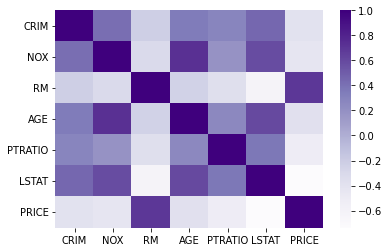

In [3]:
# Make a heatmap of the correlations.  
# Identify any features that have a correlation coefficient of magnitude 0.5 (could be + or -) or greater with price.   
# We will limit our analysis to these three features.

corr = boston_housing_df.corr()
print = sns.heatmap(corr, cmap = "Purples")

boston_housing_df.corr().round(2)

Features with a correlation coefficient greater than 0.5(+/-) are:

    RM (0.70)
    PTRATIO (-0.51)
    LSTAT (-0.74)

In [4]:
# Select columns for your feature matrix (X) and select PRICE for your target vector (y).
X = boston_housing_df.drop(["PRICE","CRIM", "NOX", "AGE"], axis = 1)
y = boston_housing_df["PRICE"]


In [5]:
# Split your data into train and test groups. Please use random number 42 for consistency!
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [6]:
# Instantiate your model and fit it on the training set.
scaler = StandardScaler()
reg = LinearRegression()

lin_reg_pipe = make_pipeline(scaler, reg)

lin_reg_pipe.fit(X_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [7]:
# Evaluate your model performance using R^2 on the training set and on the test set.
# Is there a difference between model performance on the training data vs the test data?

train_pred = lin_reg_pipe.predict(X_train)
test_pred = lin_reg_pipe.predict(X_test)

r2_Train = r2_score(y_train, train_pred)
r2_test = r2_score(y_test, test_pred)

r2_Train

0.6877966145058925

In [8]:
r2_test

0.6331590458194676

r2_Train = 0.69

r2_test = 0.63

In [9]:
# Evaluate your model using mean absolute error (MAE).
mae_train = mean_absolute_error(y_train, train_pred)
mae_test = mean_absolute_error(y_test, test_pred)

mae_train

3.714054057158005

In [10]:
mae_test

3.3918448293813976

In [11]:
# Evaluate your model using mean squared error (MSE). 
mse_train = mean_squared_error(y_train, train_pred)
mse_test = mean_squared_error(y_test, test_pred)

mse_train

27.68673681796949

In [12]:
mse_test

25.688824196675963

In [13]:
# Evaluate your model performance using RMSE on the training set and on the test set.
# This metric is useful because the units will be in the same units as your target vector. 
# In this case 1,000 of dollars.  

rmse_train = np.sqrt(mean_squared_error(y_train, train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, test_pred))

rmse_train

5.261818774717492

In [14]:
rmse_test

5.0684143671049595